### ESMA 3016
### Edgar Acuna
### Lab16: Aproximacion Normal a la Binomial (Moivre, 1733)

In [2]:
from scipy.stats  import binom,norm
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,factorial,pi
%matplotlib inline

In [3]:
#Si X es binomial(n.p) entonces Z=(X-np)/sqrt(npq) is N(0,1) cuando n es grande
#Como X es discreta y Z es continua se aplica un factor de correccion por continuidad de .5
#Asi P[X=k]~P[k-.5<X<k+.5]~P[(k-.5-np)/sqrt(npq)<Z<(k+.5-np)/sqrt(npq)]
#Ejemplo 1. con n=20 y p=.3 y k=8), np=6 y npq=4.2
p_exacta=binom.pmf(8,20,.3)
p_exacta

0.11439673970486092

In [4]:
#Estandararizando
p_aprox1=norm.cdf(2.5/sqrt(4.2))-norm.cdf(1.5/sqrt(4.2))
p_aprox1

0.12085104152256032

In [5]:
#Sin estandarizar
p_aprox2=norm.cdf(8.5,6,sqrt(4.2))-norm.cdf(7.5,6,sqrt(4.2))
p_aprox2

0.12085104152256032

In [7]:
#Ejemplo 2. con n=100 y p=.4 y k=45, np=40 y npq=24
p_exacta=binom.pmf(45,100,.4)
p_aprox=norm.cdf(5.5/sqrt(24))-norm.cdf(4.5/sqrt(24))
print p_exacta, p_aprox

0.0478111801034 0.0483771153675


In [8]:
#Ejemplo 3. con n=100 y p=.4 y k=30, np=40 y npq=24
p_exacta=binom.pmf(30,100,.4)
p_aprox=norm.cdf(-9.5/sqrt(24))-norm.cdf(-10.5/sqrt(24))
print p_exacta, p_aprox

0.0100075048858 0.0101953827905


In [9]:
#otras formulas:
#P[a<=X<=b]~P[(a-.5-np)/sqrt(npq)<Z<(b+.5-np)/sqrt(npq)]=F[(b+.5-np)/sqrt(npq)]-F[(a-.5-np)/sqrt(npq)]
#Ejemplo 4. con n=100 y p=.4, calcular P(25<=X<=35)
p_exacta=binom.cdf(35,100,.4)-binom.cdf(24,100,.4)
p_aprox=norm.cdf(-4.5/sqrt(24))-norm.cdf(-15.5/sqrt(24))
print p_exacta, p_aprox

0.178907817409 0.178384946862


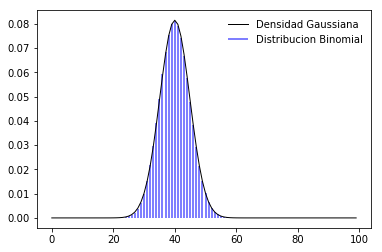

In [13]:
#Trazando las probabilidades binomiales y la curva normal que aproxima las probabilidades
#Teorema de Moivre
x=np.arange(0,100,1)
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, binom.pmf(x,100,.4), colors='b', lw=2, alpha=0.5, label='Distribucion Binomial')
ax.plot(x, norm.pdf(x,40,sqrt(24)), 'k-', lw=1, label='Densidad Gaussiana')
ax.legend(loc='best', frameon=False)

In [14]:
#Teorema de Moivre pero usando proporciones, phat=X/n, proporcion de eventos en una muestra 
#de tamano n, 
#phat es un numero entre 0 y 1.
#Z=(phat-p)/sqrt(pq/n) es aproximadamnte N(0,1), la probabilidad p es conocida
#Formula Prob(phat<po)=P(Z<(po-p)/sqrt(pq/n))
#Ejemplo 4. Cual es la probabilidad estimada de que en una muestra de tamano 100, la proporcion 
#de  eventos sea menor de .6
# si se sabe que en la probabilidad de ocurrencia p es .4
p_aprox=norm.cdf(.6,.4,sqrt(.0024))
#La probabiidad exacta es
p_exacta=binom.cdf(59,100,.4)
print p_exacta, p_aprox

0.999957533613 0.999977721455
